**Field Description**


**C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS**


**C/A**      = Control Area (A002)

**UNIT**     = Remote Unit for a station (R051)

**SCP**      = Subunit Channel Position represents an specific address for a device (02-00-00)

**STATION**  = Represents the station name the device is located at

**LINENAME** = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
           
**DIVISION** = Represents the Line originally the station belonged to BMT, IRT, or IND  

**DATE**     = Represents the date (MM-DD-YY)

**TIME**     = Represents the time (hh:mm:ss) for a scheduled audit event
 
**ENTRIES** = The comulative entry register value for a device

**EXIST**    = The cumulative exit register value for a device

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import glob
folder_path = './data/MTA Data/'
file_paths = glob.glob(folder_path + '/*.csv')

In [3]:
#df = pd.read_csv('/Users/avinashvijay/Desktop/NYU/Big Data/project/data/MTA Data/*')
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

In [4]:
df_copy = pd.concat(dfs, ignore_index=True)

In [11]:
#df_copy = df.copy()

In [12]:
#del df_copy

In [5]:
df_copy.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
df_copy.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,00:00:00,REGULAR,7413507.0,2516927.0
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,04:00:00,REGULAR,7413507.0,2516927.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,08:00:00,REGULAR,7413511.0,2516935.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,12:00:00,REGULAR,7413521.0,2516944.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,16:00:00,REGULAR,7413541.0,2516953.0


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11173582 entries, 0 to 11173581
Data columns (total 12 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   Unnamed: 0                                                            int64 
 1   C/A                                                                   object
 2   UNIT                                                                  object
 3   SCP                                                                   object
 4   STATION                                                               object
 5   LINENAME                                                              object
 6   DIVISION                                                              object
 7   DATE                                                                  object
 8   TIME                                                        

In [9]:
df_copy.shape

(11173582, 12)

In [10]:
df_copy

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,00:00:00,REGULAR,7706010,2698804
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,04:00:00,REGULAR,7706014,2698808
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,08:00:00,REGULAR,7706017,2698835
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,12:00:00,REGULAR,7706038,2698924
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,16:00:00,REGULAR,7706084,2698963
...,...,...,...,...,...,...,...,...,...,...,...,...
11173577,11173577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,04:00:00,REGULAR,0,23
11173578,11173578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,08:00:00,REGULAR,0,23
11173579,11173579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,12:00:00,REGULAR,0,23
11173580,11173580,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,16:00:00,REGULAR,0,23


In [11]:
df_copy.describe()

,Unnamed: 0,ENTRIES,EXITS
count,1.117358e+07,1.117358e+07,1.117358e+07
mean,5.586790e+06,4.230292e+07,3.387914e+07
std,3.225535e+06,2.218123e+08,1.949819e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.793395e+06,2.529130e+05,1.387930e+05
50%,5.586790e+06,1.333600e+06,8.960915e+05
75%,8.380186e+06,5.933341e+06,3.941057e+06
max,1.117358e+07,2.147340e+09,2.147414e+09


In [7]:
df_copy.isnull().sum()

Unnamed: 0                                                              0
C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 1
EXITS                                                                   1
dtype: int64

In [6]:
df_copy = df_copy.dropna()

In [7]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'
df_copy["TURNSTILE"] = df_copy["C/A"] + "-" + df_copy["UNIT"]+"-"+ df_copy["SCP"]

In [8]:
#concatting date and time
df_copy['Datetime']= df_copy['DATE']+" "+ df_copy['TIME']

In [9]:
#converting date and time to datetime
df_copy['Datetime'] = pd.to_datetime(df_copy['Datetime'])

In [10]:
df_copy["NAMEOFDAY"]= df_copy["Datetime"].dt.day_name()

In [11]:
df_copy.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,Datetime,NAMEOFDAY
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,00:00:00,REGULAR,7413507.0,2516927.0,A002-R051-02-00-00,2020-04-04 00:00:00,Saturday
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,04:00:00,REGULAR,7413507.0,2516927.0,A002-R051-02-00-00,2020-04-04 04:00:00,Saturday
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,08:00:00,REGULAR,7413511.0,2516935.0,A002-R051-02-00-00,2020-04-04 08:00:00,Saturday
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,12:00:00,REGULAR,7413521.0,2516944.0,A002-R051-02-00-00,2020-04-04 12:00:00,Saturday
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/04/2020,16:00:00,REGULAR,7413541.0,2516953.0,A002-R051-02-00-00,2020-04-04 16:00:00,Saturday


In [70]:
df_copy.duplicated().sum()

0

In [12]:
df_copy.reset_index(drop=True, inplace=True)

In [13]:
df_copy.columns = df_copy.columns.str.replace(" ", "")

In [14]:
df_copy = df_copy[["STATION","TURNSTILE","DATE","TIME","Datetime","NAMEOFDAY","ENTRIES","EXITS"]]

In [15]:
df_copy.head()

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,04/04/2020,00:00:00,2020-04-04 00:00:00,Saturday,7413507.0,2516927.0
1,59 ST,A002-R051-02-00-00,04/04/2020,04:00:00,2020-04-04 04:00:00,Saturday,7413507.0,2516927.0
2,59 ST,A002-R051-02-00-00,04/04/2020,08:00:00,2020-04-04 08:00:00,Saturday,7413511.0,2516935.0
3,59 ST,A002-R051-02-00-00,04/04/2020,12:00:00,2020-04-04 12:00:00,Saturday,7413521.0,2516944.0
4,59 ST,A002-R051-02-00-00,04/04/2020,16:00:00,2020-04-04 16:00:00,Saturday,7413541.0,2516953.0


In [75]:
len(df_copy["STATION"].unique())

379

In [16]:
df_copy.sort_values(['TURNSTILE','Datetime'], ascending= (True,True) , inplace=True)

In [17]:
FOUR_HOUR_ENTRIES = df_copy.ENTRIES - df_copy.ENTRIES.shift(1) 

In [18]:
df_copy['FOUR_HOUR_ENTRIES'] = FOUR_HOUR_ENTRIES.fillna(0)

In [19]:
FOUR_HOUR_EXITS = df_copy.EXITS - df_copy.EXITS.shift(1) 

In [20]:
df_copy['FOUR_HOUR_EXITS'] = FOUR_HOUR_EXITS.fillna(0)

In [21]:
df_copy.head(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
68485121,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,00:00:00,2014-10-11 00:00:00,Saturday,4820917.0,1635728.0,0.0,0.0
68485122,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,04:00:00,2014-10-11 04:00:00,Saturday,4820962.0,1635732.0,45.0,4.0
68485123,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,08:00:00,2014-10-11 08:00:00,Saturday,4820978.0,1635762.0,16.0,30.0
68485124,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,12:00:00,2014-10-11 12:00:00,Saturday,4821074.0,1635866.0,96.0,104.0
68485125,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,16:00:00,2014-10-11 16:00:00,Saturday,4821308.0,1635920.0,234.0,54.0
68485126,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,20:00:00,2014-10-11 20:00:00,Saturday,4821671.0,1635968.0,363.0,48.0
68485127,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,00:00:00,2014-10-12 00:00:00,Sunday,4821833.0,1636003.0,162.0,35.0
68485128,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,04:00:00,2014-10-12 04:00:00,Sunday,4821882.0,1636008.0,49.0,5.0
68485129,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,08:00:00,2014-10-12 08:00:00,Sunday,4821904.0,1636029.0,22.0,21.0
68485130,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,12:00:00,2014-10-12 12:00:00,Sunday,4821995.0,1636099.0,91.0,70.0


In [22]:
FOOT_TRAFFIC = df_copy.FOUR_HOUR_ENTRIES + df_copy.FOUR_HOUR_EXITS 
df_copy['FOOT_TRAFFIC'] = FOOT_TRAFFIC

In [23]:
df_copy.head(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
68485121,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,00:00:00,2014-10-11 00:00:00,Saturday,4820917.0,1635728.0,0.0,0.0,0.0
68485122,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,04:00:00,2014-10-11 04:00:00,Saturday,4820962.0,1635732.0,45.0,4.0,49.0
68485123,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,08:00:00,2014-10-11 08:00:00,Saturday,4820978.0,1635762.0,16.0,30.0,46.0
68485124,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,12:00:00,2014-10-11 12:00:00,Saturday,4821074.0,1635866.0,96.0,104.0,200.0
68485125,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,16:00:00,2014-10-11 16:00:00,Saturday,4821308.0,1635920.0,234.0,54.0,288.0
68485126,LEXINGTON AVE,A002-R051-02-00-00,10/11/2014,20:00:00,2014-10-11 20:00:00,Saturday,4821671.0,1635968.0,363.0,48.0,411.0
68485127,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,00:00:00,2014-10-12 00:00:00,Sunday,4821833.0,1636003.0,162.0,35.0,197.0
68485128,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,04:00:00,2014-10-12 04:00:00,Sunday,4821882.0,1636008.0,49.0,5.0,54.0
68485129,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,08:00:00,2014-10-12 08:00:00,Sunday,4821904.0,1636029.0,22.0,21.0,43.0
68485130,LEXINGTON AVE,A002-R051-02-00-00,10/12/2014,12:00:00,2014-10-12 12:00:00,Sunday,4821995.0,1636099.0,91.0,70.0,161.0


In [84]:
df_copy.tail(10)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
1467207,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/23/2021,04:00:00,2021-12-23 04:00:00,Thursday,5562,979,0.0,0.0,0.0
1467208,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/23/2021,08:00:00,2021-12-23 08:00:00,Thursday,5562,979,0.0,0.0,0.0
1467209,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/23/2021,16:00:00,2021-12-23 16:00:00,Thursday,5562,979,0.0,0.0,0.0
1467210,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/23/2021,20:00:00,2021-12-23 20:00:00,Thursday,5562,979,0.0,0.0,0.0
1467211,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,00:00:00,2021-12-24 00:00:00,Friday,5562,979,0.0,0.0,0.0
1467212,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,04:00:00,2021-12-24 04:00:00,Friday,5562,979,0.0,0.0,0.0
1467213,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,08:00:00,2021-12-24 08:00:00,Friday,5562,979,0.0,0.0,0.0
1467214,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,12:00:00,2021-12-24 12:00:00,Friday,5562,979,0.0,0.0,0.0
1467215,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,16:00:00,2021-12-24 16:00:00,Friday,5562,994,0.0,15.0,15.0
1467216,RIT-ROOSEVELT,TRAM2-R469-00-05-01,12/24/2021,20:00:00,2021-12-24 20:00:00,Friday,5562,994,0.0,0.0,0.0


In [24]:
df_copy = df_copy.loc[(df_copy['FOUR_HOUR_ENTRIES']>0) & (df_copy['FOUR_HOUR_EXITS']>0),]

In [25]:
df_copy.FOUR_HOUR_ENTRIES.max()

2146429620.0

In [26]:
df_copy.FOUR_HOUR_ENTRIES.min()

1.0

In [27]:
df_copy.FOUR_HOUR_EXITS.max()

2147344910.0

In [28]:
df_copy.FOUR_HOUR_EXITS.min()

1.0

In [29]:
df_copy.FOOT_TRAFFIC.min()

2.0

In [30]:
#excluding values above 10000
df_copy['FOUR_HOUR_ENTRIES'] = df_copy.groupby(['TURNSTILE']).FOUR_HOUR_ENTRIES.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [31]:
# clean 'HOURLY_EXITS'
df_copy['FOUR_HOUR_EXITS'] = df_copy.groupby(['TURNSTILE']).FOUR_HOUR_EXITS.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

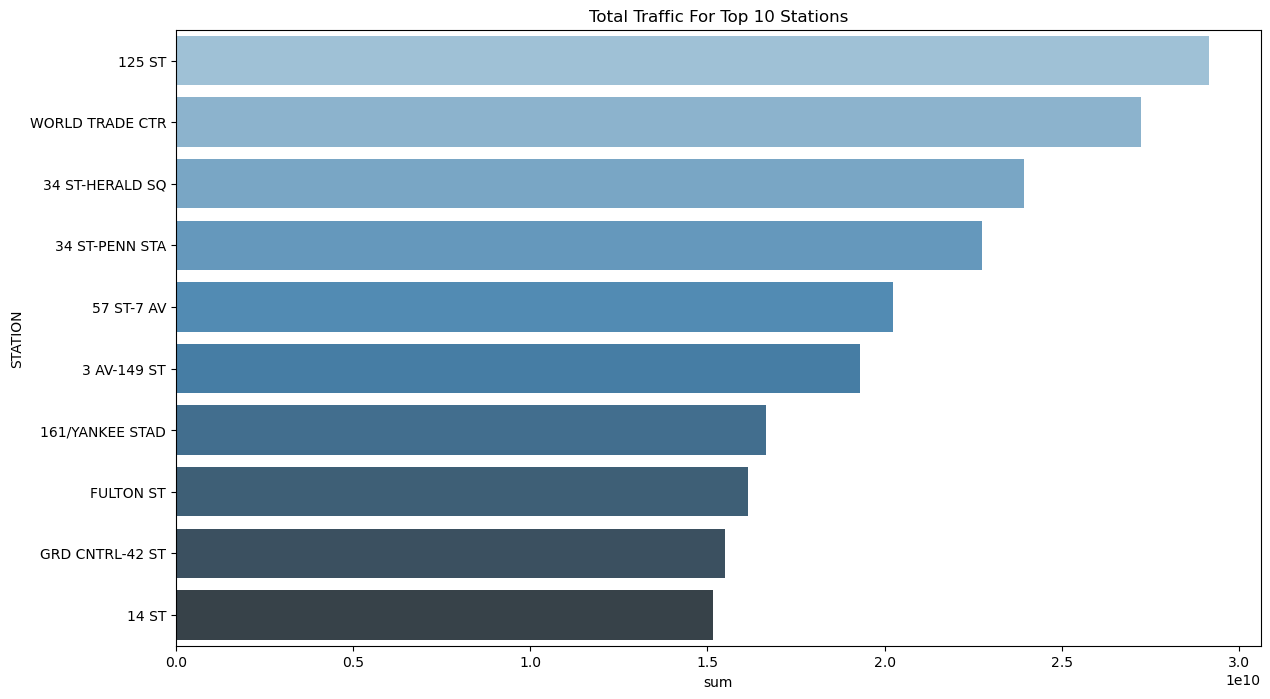

In [32]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = df_copy.groupby(['STATION']).FOOT_TRAFFIC.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

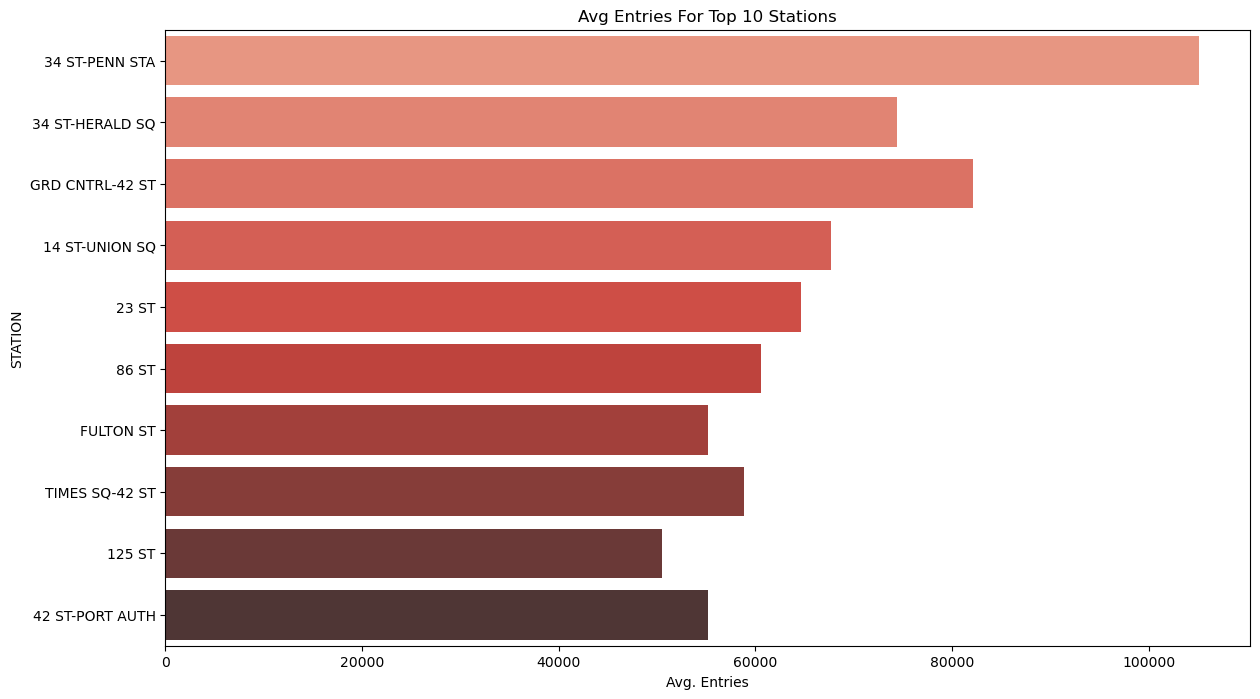

In [32]:
#Avg Entries For Top 10 Stations
entriesByStDt = df_copy.groupby(['STATION','DATE','NAMEOFDAY']).FOUR_HOUR_ENTRIES.sum().reset_index()

top10St = entriesByStDt.groupby('STATION').FOUR_HOUR_ENTRIES.sum().reset_index().nlargest(10,'FOUR_HOUR_ENTRIES')[['STATION']]

entriesTop10St = top10St.merge(entriesByStDt, on='STATION')

plt.figure(figsize=(14, 8))
plt.title("Avg Entries For Top 10 Stations")
ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")
ax.set(xlabel='Avg. Entries', ylabel='STATION')

plt.savefig('AverageEntriesForTop10Stations.png', dpi=1000)

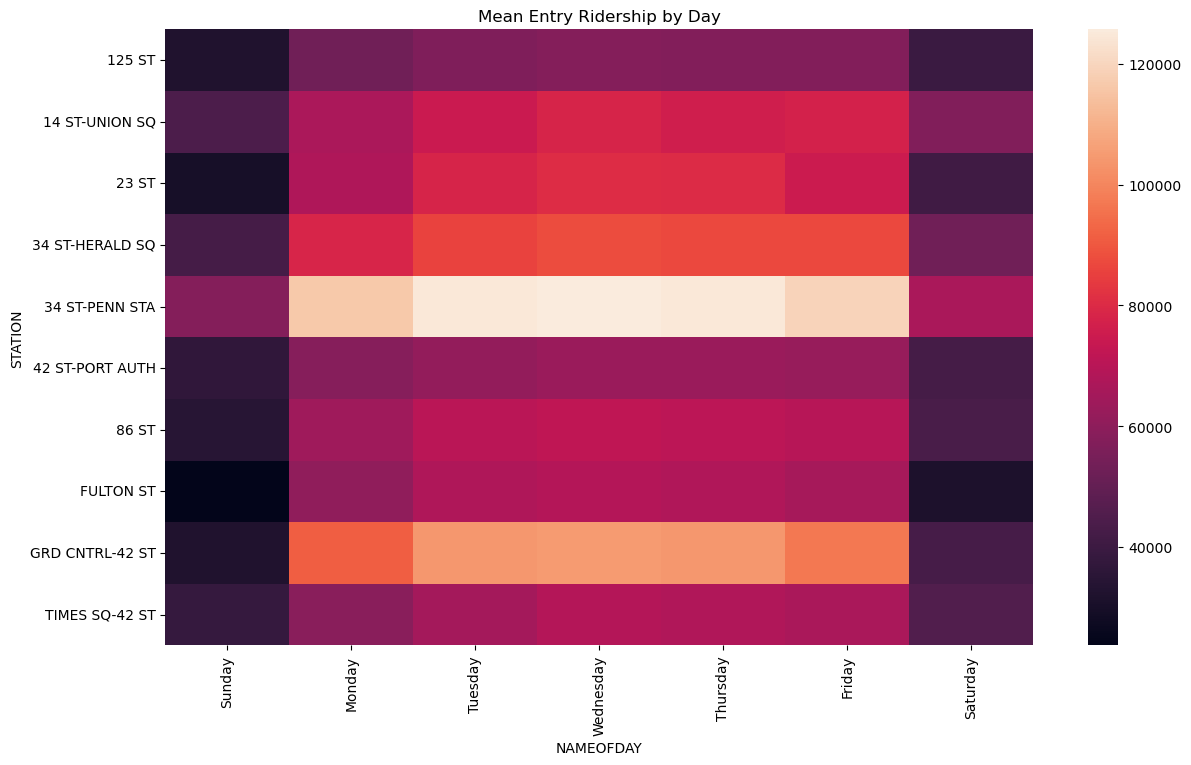

In [33]:
top10 = list(df_copy.groupby(['STATION']).FOUR_HOUR_ENTRIES.agg(['sum']).sort_values('sum', ascending=False).head(10).reset_index()['STATION'])
tDF = df_copy.groupby([
'STATION',
 'DATE','NAMEOFDAY']).FOUR_HOUR_ENTRIES.agg("sum").reset_index()

tDF2 = tDF[tDF.STATION.isin(top10)]
tDF3 = tDF2.groupby(["STATION", "NAMEOFDAY"]).FOUR_HOUR_ENTRIES.mean().reset_index()
tDF3
tDF4 = tDF3.pivot("STATION", "NAMEOFDAY", "FOUR_HOUR_ENTRIES")
tDF4 = tDF4[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]]
fig = plt.figure()
sns.heatmap(tDF4)
plt.xticks(rotation="vertical")
plt.title("Mean Entry Ridership by Day")
fig.set_size_inches(14,8)
fig.savefig("MeanEntriesbyDay.png",dpi=1000)

In [44]:
df_copy["year"] = df_copy.Datetime.dt.year

In [46]:
df_copy['month'] = df_copy.Datetime.dt.month_name()

In [47]:
df_copy["day"] = df_copy.Datetime.dt.day_name()

In [60]:
year = df_copy.groupby("year").agg({"FOUR_HOUR_ENTRIES":"mean","FOUR_HOUR_EXITS":"mean"}).reset_index().sort_values(['year'],ascending=[False])
year.sort_values(['year'], ascending= (True) , inplace=True)
year.head(7)

,year,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
0,2014,227.466392,173.957120
1,2015,219.873218,166.256816
2,2016,217.775614,162.846650
3,2017,213.114240,161.205193
4,2018,207.070065,157.778379
5,2019,202.331393,160.062955
6,2020,79.262750,71.822370


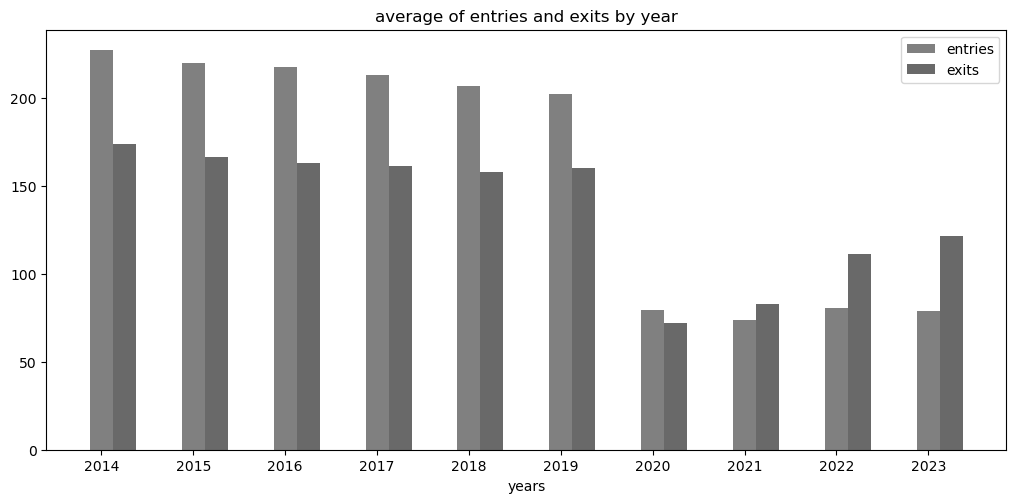

In [62]:
fig = plt.figure(figsize=[12,7])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
years = list(year.year)
indeks = np.arange(len(years))
a = 0.25
entries = list(year.FOUR_HOUR_ENTRIES)
exits = list(year.FOUR_HOUR_EXITS)
chart.bar(indeks,entries,width=a, label = "entries",color="#808080") 
chart.bar(indeks+a,exits,width=a, label = "exits",color="#696969")
chart.set_title("average of entries and exits by year")
chart.set_xlabel("years")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=years) 
chart.legend()
plt.show()
fig.savefig("MeanEntriesbyyear.png")

* In 2020 and 2021, there has been a decrease in total entries and exits due to the effect of the pandemic.
* While analyzing on a month, day and station basis, it does not provide us with descriptive analyzes in 2020 and 2021, so we will exclude it from our data in these years.

In [68]:
month = df_copy.groupby("month").agg({"FOUR_HOUR_ENTRIES":"mean","FOUR_HOUR_EXITS":"mean"}).reset_index().sort_values(['FOUR_HOUR_ENTRIES'],ascending=[False])
month.head(12)

,month,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
10,October,174.739051,146.094162
9,November,168.183319,141.012450
6,June,163.249538,136.221395
11,September,162.223604,137.274517
2,December,161.513431,136.467437
8,May,161.367932,132.265399
3,February,160.863874,135.912336
7,March,158.108989,134.800934
4,January,152.518423,128.636750
1,August,152.238975,129.860452


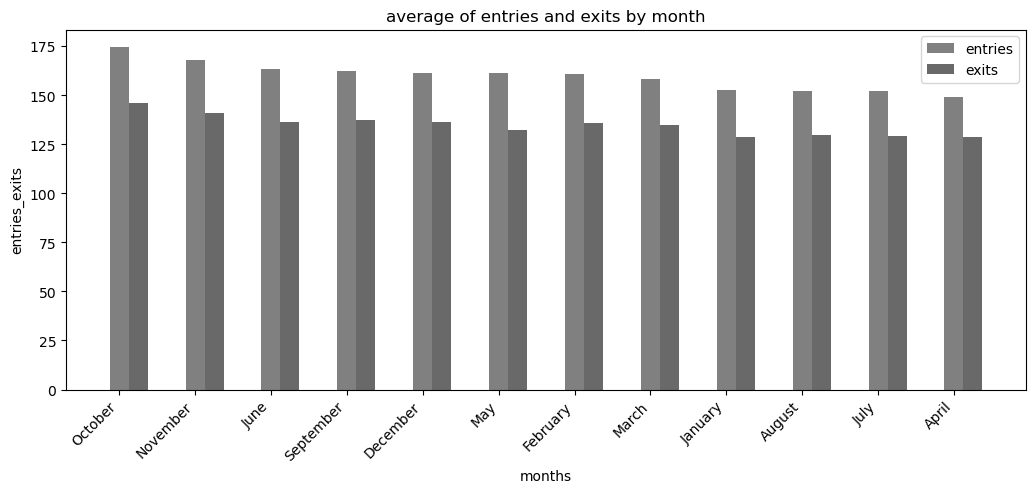

In [81]:
fig = plt.figure(figsize=[12,6])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
months = list(month.month)
indeks = np.arange(len(months))
a = 0.25
entries_month = list(month.FOUR_HOUR_ENTRIES)
exits_month = list(month.FOUR_HOUR_EXITS)
chart.bar(indeks,entries_month,width=a, label = "entries",color="#808080") 
chart.bar(indeks+a,exits_month,width=a, label = "exits",color="#696969")
plt.xticks(rotation=45, ha='right')
chart.set_title("average of entries and exits by month")
chart.set_xlabel("months")
chart.set_ylabel("entries_exits")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=months) 
chart.legend()
plt.show()
fig.savefig("MeanEntriesbymonth.png")

* It is seen that the spring months are relatively busier than the other months.

,ENTRIES,EXITS
STATION,,
CHAMBERS ST,6.772180e+13,4.566843e+13
34 ST-PENN STA,6.560940e+13,5.167376e+13
FULTON ST,6.364534e+13,4.590630e+13
183 ST,6.300464e+13,4.408446e+13
23 ST,6.212581e+13,5.486693e+13
125 ST,5.796872e+13,4.596955e+13
TIMES SQ-42 ST,5.788493e+13,2.575985e+13
CANAL ST,5.532425e+13,6.330318e+13
42 ST-PORT AUTH,5.477889e+13,4.032690e+13


AttributeError: 'DataFrame' object has no attribute 'STATION'

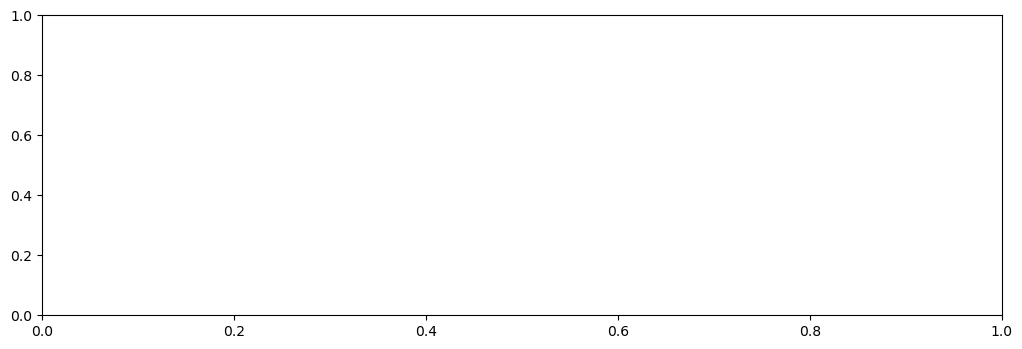

In [79]:
fig = plt.figure(figsize=[12,5])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
stations = list(station.STATION)
indeks = np.arange(len(stations))
a = 0.25
entries_station = list(station.ENTRIES)
exits_station = list(station.EXITS)
chart.bar(indeks,entries_station,width=a, label = "entries",color="#5F9EA0") 
chart.bar(indeks+a,exits_station,width=a, label = "exits",color="#483D8B")
plt.xticks(rotation=45, ha='right')
chart.set_title("daily entry and exit averages by stations")
chart.set_xlabel("stations")
chart.set_ylabel("entries_exits")
chart.set_xticks(ticks = indeks) 
chart.set_xticklabels(labels=stations)
chart.legend()
plt.show()

In [34]:
df_copy['WEEKYEAR'] = df_copy.Datetime.dt.isocalendar().week

In [35]:
df_copy['WEEKDAY'] = df_copy.Datetime.dt.weekday

In [36]:
def weeklygraph(mask, station):
    
    mta_year = df_copy[mask].groupby(['STATION','WEEKYEAR', 'WEEKDAY'],as_index=False)[['FOUR_HOUR_ENTRIES']].first()

    for i in mta_year.WEEKYEAR.unique():
        mask = mta_year.WEEKYEAR == i

        plt.title("Entries by Week - {}".format(station))

        #color and label the season
        #blue - winter, orange - fall
        seasons_c = ['blue', 'blue', 'pink', 'pink', 'pink', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'blue']

        if i <= 8:
            color = 'blue'
            leg = 'winter'
        elif i <= 20:
            leg = 'spring'
            color = 'pink'
        elif i <= 32:
            color = 'red'
            leg = 'summer'
        else:
            color = 'orange'
            leg = 'fall'

        patch1 = mpatches.Patch(color='red', label='Summer')
        patch2 = mpatches.Patch(color='orange', label='Fall')
        patch3 = mpatches.Patch(color='pink', label='Spring')
        patch4 = mpatches.Patch(color='blue', label='Winter')    


        plt.plot(mta_year[mask].WEEKDAY, mta_year[mask].FOUR_HOUR_ENTRIES, color=color, alpha=0.5, label=leg)

        plt.xticks(ticks = range(7), labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.xlabel("Day of Week")
       # plt.ylabel("Entries");
        plt.legend(handles=[patch1, patch2, patch3, patch4])


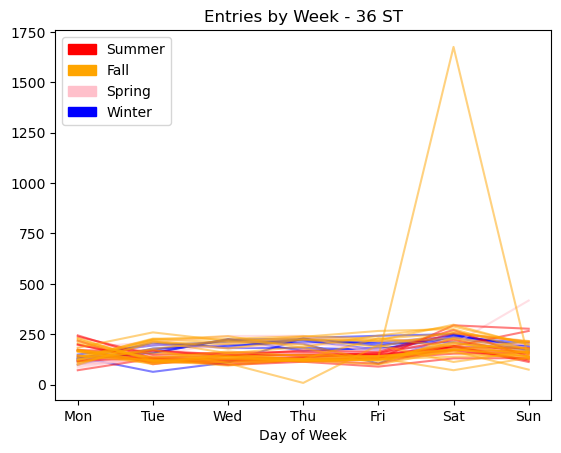

In [37]:
import matplotlib.patches as mpatches
mask = (df_copy.STATION == '36 ST')

weeklygraph(mask, '36 ST')
plt.savefig('weeklygraph-67th.png')

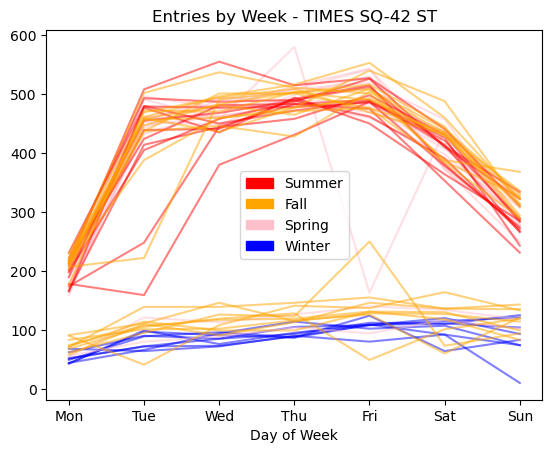

In [45]:
mask = (df_copy.STATION == 'TIMES SQ-42 ST')

weeklygraph(mask, 'TIMES SQ-42 ST')
plt.savefig('weeklygraph-timesquare.png')

In [46]:
holidays = {"01/01/2020" : "New Years",
            "01/20/2020" : "MLK Day",
            "02/12/2020" : "Lincolns Bday",
            "09/07/2020" : "Labor Day",
            "10/12/2020" : "Columbus Day",
            "11/11/2020" : "Veterans Day",
            "11/26/2020" : "Thanksgiving",
            "12/25/2020" : "Christmas Day",
            "01/01/2021" : "New Years Day",
            "01/18/2021" : "MLK Day",
            "02/12/2021" : "Lincolns Bday",
            "02/15/2021" : "Washingtons Bday"}

In [47]:
holidays = {"01/01" : "New Years",
            "01/20" : "MLK Day",
            "02/12" : "Lincolns Bday",
            "09/07" : "Labor Day",
            "10/12" : "Columbus Day",
            "11/11" : "Veterans Day",
            "11/26" : "Thanksgiving",
            "12/25" : "Christmas Day"}

df_copy['HOLIDAY'] = pd.to_datetime(df_copy['DATE']).dt.strftime('%m/%d').map(holidays)

In [48]:
df_copy.HOLIDAY.fillna("", inplace=True)

In [188]:
df_copy['HOLIDAY'].dtype

dtype('O')

In [49]:
df_copy.sort_values('FOUR_HOUR_ENTRIES', ascending=False, inplace=True)
df_copy['RANK'] = df_copy.FOUR_HOUR_ENTRIES.rank()

In [57]:
df_copy.head(25)

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC,WEEKYEAR,WEEKDAY,HOLIDAY,RANK
68165417,CHURCH AVE,N546-R204-00-00-00,12/06/2014,03:00:00,2014-12-06 03:00:00,Saturday,5045872.0,13155529.0,9999.0,287.711465,37392.0,49,5,,72178486.0
68702308,167 ST,N206-R104-01-06-01,11/29/2014,03:00:00,2014-11-29 03:00:00,Saturday,1771884.0,233229.0,9996.0,1468.000000,11464.0,48,5,,72178485.0
68204535,FULTON ST,R205A-R014-04-03-00,12/06/2014,00:00:00,2014-12-06 00:00:00,Saturday,2556016.0,1985874.0,9980.0,8593.000000,18573.0,49,5,,72178483.5
77591046,125 ST,R305-R206-01-00-00,03/26/2016,01:00:00,2016-03-26 01:00:00,Saturday,74397552.0,37855629.0,9980.0,5073.000000,15053.0,12,5,,72178483.5
77591118,125 ST,R305-R206-01-00-02,03/26/2016,01:00:00,2016-03-26 01:00:00,Saturday,9156290.0,5884094.0,9965.0,5346.000000,15311.0,12,5,,72178481.5
31677234,NEWARK BM BW,PTH18-R549-01-02-04,02/08/2022,15:16:21,2022-02-08 15:16:21,Tuesday,62048.0,32466.0,9965.0,4.754651,39417.0,6,1,,72178481.5
68184190,FULTON ST,R113-R028-01-01-01,12/06/2014,02:00:00,2014-12-06 02:00:00,Saturday,527836.0,605960.0,9964.0,124.369929,20351.0,49,5,,72178480.0
68165589,CHURCH AVE,N546-R204-00-00-04,12/06/2014,03:00:00,2014-12-06 03:00:00,Saturday,4697106.0,3179087.0,9947.0,6411.000000,16358.0,49,5,,72178479.0
68701413,155 ST,N202-R315-00-00-02,11/29/2014,00:00:00,2014-11-29 00:00:00,Saturday,4055646.0,1560517.0,9942.0,3513.000000,13455.0,48,5,,72178477.5
68248419,FRANKLIN AVE,R622-R123-00-00-03,12/06/2014,03:00:00,2014-12-06 03:00:00,Saturday,4554669.0,1868757.0,9942.0,4214.000000,14156.0,49,5,,72178477.5


In [51]:
holidaydf = (df_copy
 .groupby(['HOLIDAY'])['FOUR_HOUR_ENTRIES'].mean()
 .reset_index())

holidaydf.rename(columns = {"FOUR_HOUR_ENTRIES" : "AVG_DAILY_ENTRIES", 
                            "HOLIDAY":"FEDERAL HOLIDAY"},
                 inplace=True)
holidaydf.loc[holidaydf["FEDERAL HOLIDAY"] == "", "FEDERAL HOLIDAY"] = "**REGULAR**"

holidaydf.sort_values(["AVG_DAILY_ENTRIES"], inplace=True)

In [65]:
nonholi=(df_copy
 .groupby(['WEEKDAY'])['FOUR_HOUR_ENTRIES'].mean()
 .reset_index())

#mean_entries = nonholi['FOUR_HOUR_ENTRIES'].mean()
#mean_weekdays = df.loc[df['WEEKDAY'].isin([0, 1, 2, 3, 4]), 'FOUR_HOUR_ENTRIES'].mean()
weekdays = [0, 1, 2, 3, 4]  # Monday=0, Tuesday=1, ..., Friday=4
nonholi = nonholi[nonholi['WEEKDAY'].isin(weekdays)]

# Calculate the mean of the 'FOUR_HOUR_ENTRIES' column
nonholi_mean = nonholi['FOUR_HOUR_ENTRIES'].mean()
new_row = {'FEDERAL HOLIDAY': 'Non-Holiday', 'FOUR_HOUR_ENTRIES': nonholi_mean}

nonholi = nonholi.append(new_row, ignore_index=True)
nonholi

/var/folders/70/3040fvhs0fd921f4zs0s5qpr0000gn/T/ipykernel_36406/2941678835.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nonholi = nonholi.append(new_row, ignore_index=True)


,WEEKDAY,FOUR_HOUR_ENTRIES
0,0,169.604205
1,1,182.809347
2,2,186.399735
3,3,184.545516
4,4,179.988341
5,Mean,180.669429


In [66]:
new_row = {'FEDERAL HOLIDAY': 'Non-Holiday', 'AVG_DAILY_ENTRIES': nonholi_mean}
holidaydf = holidaydf.append(new_row, ignore_index=True)

/var/folders/70/3040fvhs0fd921f4zs0s5qpr0000gn/T/ipykernel_36406/1764223285.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holidaydf = holidaydf.append(new_row, ignore_index=True)


In [68]:
holidaydf.sort_values(["AVG_DAILY_ENTRIES"], inplace=True)
holidaydf

,FEDERAL HOLIDAY,AVG_DAILY_ENTRIES
0,Christmas Day,63.764107
1,New Years,82.455216
2,Thanksgiving,129.387617
3,MLK Day,149.197996
4,Labor Day,155.398124
5,Veterans Day,157.696069
6,**REGULAR**,160.272347
7,Lincolns Bday,162.460979
8,Columbus Day,167.556405
9,Non-Holiday,180.669429


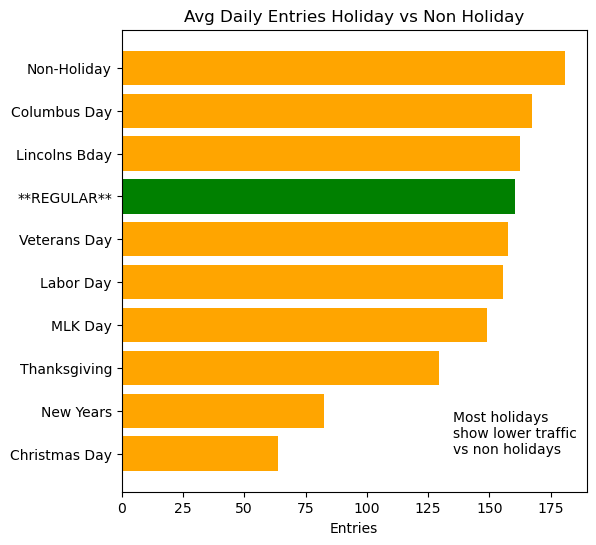

In [75]:
plt.figure(figsize=(6,6))
plt.title("Avg Daily Entries Holiday vs Non Holiday")
plt.xlabel("Entries")
#plt.ylabel("Federal Holiday")
colors = ['orange'] * 6 + ['green'] + ['orange'] * 2
plt.annotate("Most holidays \nshow lower traffic \nvs non holidays", (135,0))
plt.barh(holidaydf["FEDERAL HOLIDAY"], holidaydf.AVG_DAILY_ENTRIES, color = colors)
plt.savefig('holidayimpact.png')

## Other dummy graphs

In [99]:
#Summing up traffic by station
station_totals = df_copy.groupby('STATION').sum().sort_values('FOOT_TRAFFIC', ascending=False).head(5)
station_totals.sort_values(by='FOOT_TRAFFIC', ascending=False, inplace=True)
station_totals.reset_index(inplace=True)

In [100]:
station_totals['FOUR_HOUR_ENTRIES'] = station_totals['FOUR_HOUR_ENTRIES'].astype('int64')
station_totals['FOUR_HOUR_EXITS'] = station_totals['FOUR_HOUR_EXITS'].astype('int64')
station_totals['FOOT_TRAFFIC'] = station_totals['FOOT_TRAFFIC'].astype('int64')


In [101]:
top_5 = station_totals.head(5)
top_5

,STATION,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,34 ST-PENN STA,9535955063400,8563385334704,14503197,19776781,14719700261
1,FULTON ST,5561436161099,4740480471830,7943463,10404169,12152848892
2,161/YANKEE STAD,5654339301186,3572726260650,3119239,2157318,11874702873
3,125 ST,10081587973552,8841334396972,9332826,11814454,11282391233
4,TIMES SQ-42 ST,7853964439183,3574855345418,8192239,11329886,9948122916


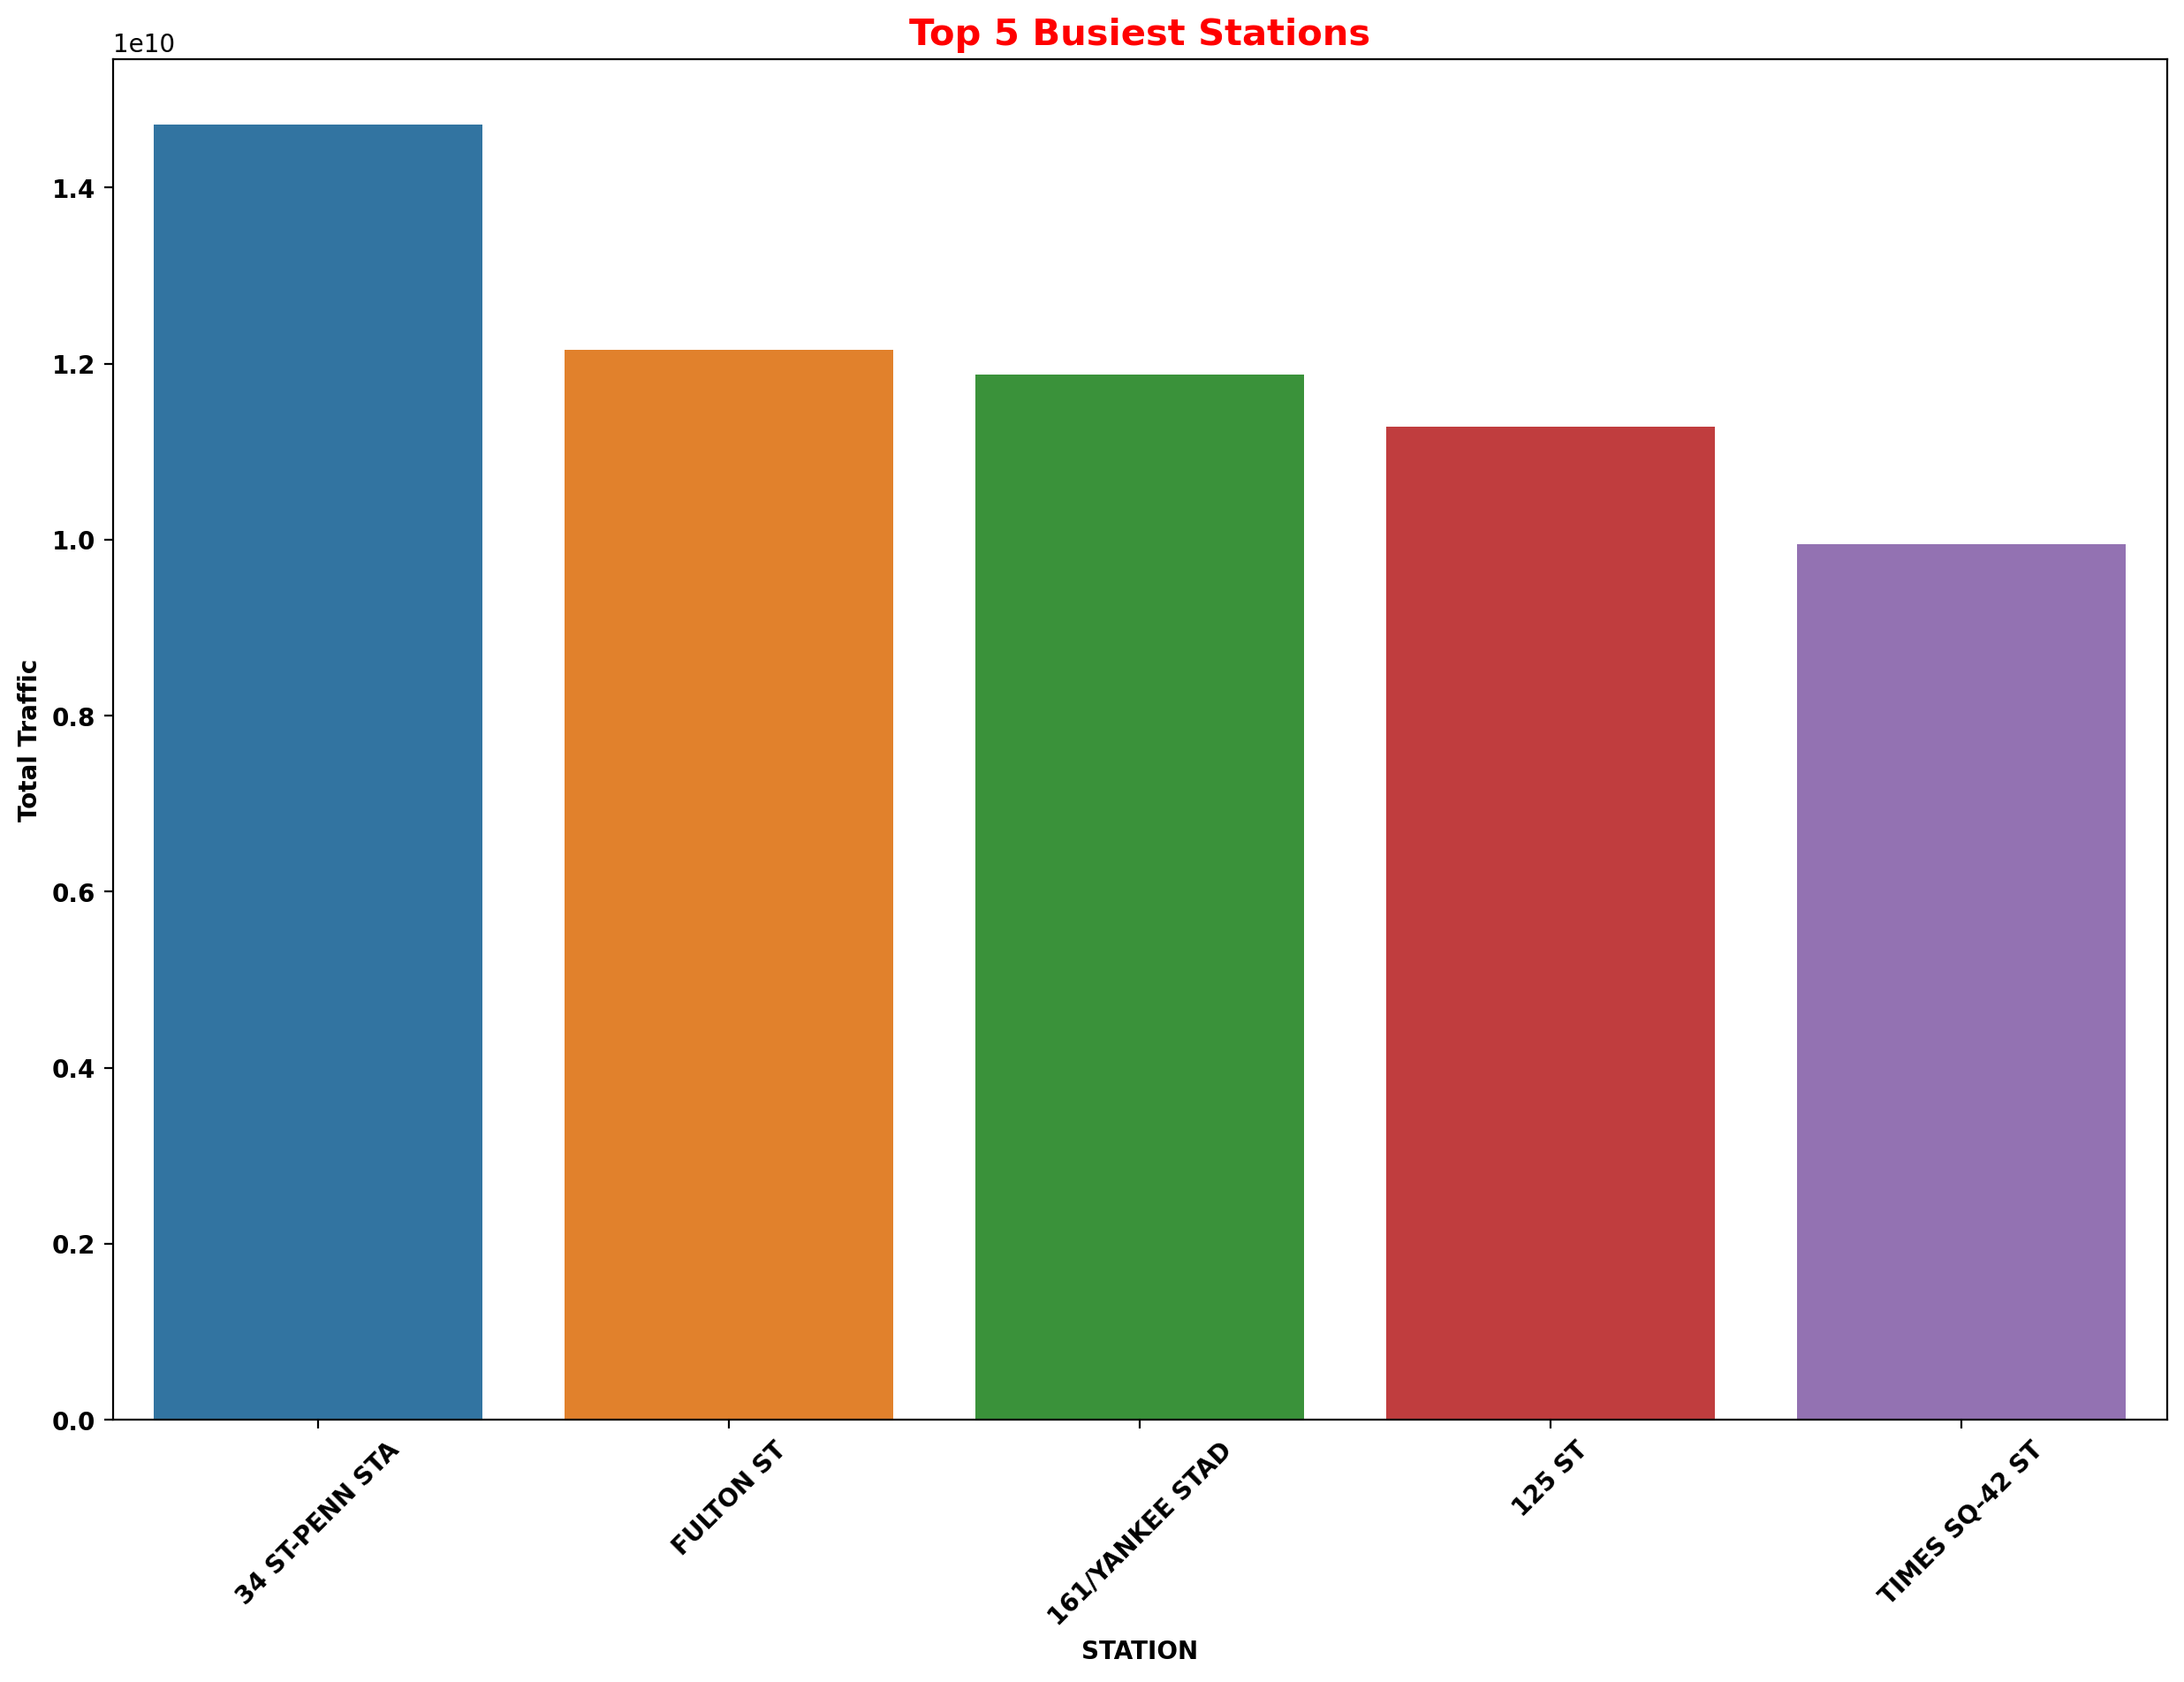

In [102]:
#Barplot for Top 5 Busiest Stations in last 12 weeks

plt.figure(figsize=(15,10),dpi=200)
plt.style.use('default')
ax = sns.barplot(x="STATION", y="FOOT_TRAFFIC", data=top_5)
plt.title("Top 5 Busiest Stations", weight="bold", c="red", fontsize=15)
plt.xlabel("STATION",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.savefig('output.png', dpi=300)
plt.show()

In [103]:
top_5_daily = df_copy.groupby(['STATION','NAMEOFDAY']).sum().sort_values('FOOT_TRAFFIC', ascending = False)

In [104]:
top_5_daily = top_5_daily.reset_index()

In [105]:
top_5_daily = top_5_daily[(top_5_daily["STATION"]=="34 ST-PENN STA") 
                   | (top_5_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (top_5_daily["STATION"]=="86 ST")
                  | (top_5_daily["STATION"]=="34 ST-HERALD SQ")
                  | (top_5_daily["STATION"]=="14 ST-UNION SQ")]

In [106]:
top_5_daily = top_5_daily.sort_values(by = ['STATION', 'NAMEOFDAY'], ascending =(True, True))

In [107]:
top_5_daily.STATION.value_counts()

14 ST-UNION SQ     7
34 ST-HERALD SQ    7
34 ST-PENN STA     7
86 ST              7
GRD CNTRL-42 ST    7
Name: STATION, dtype: int64

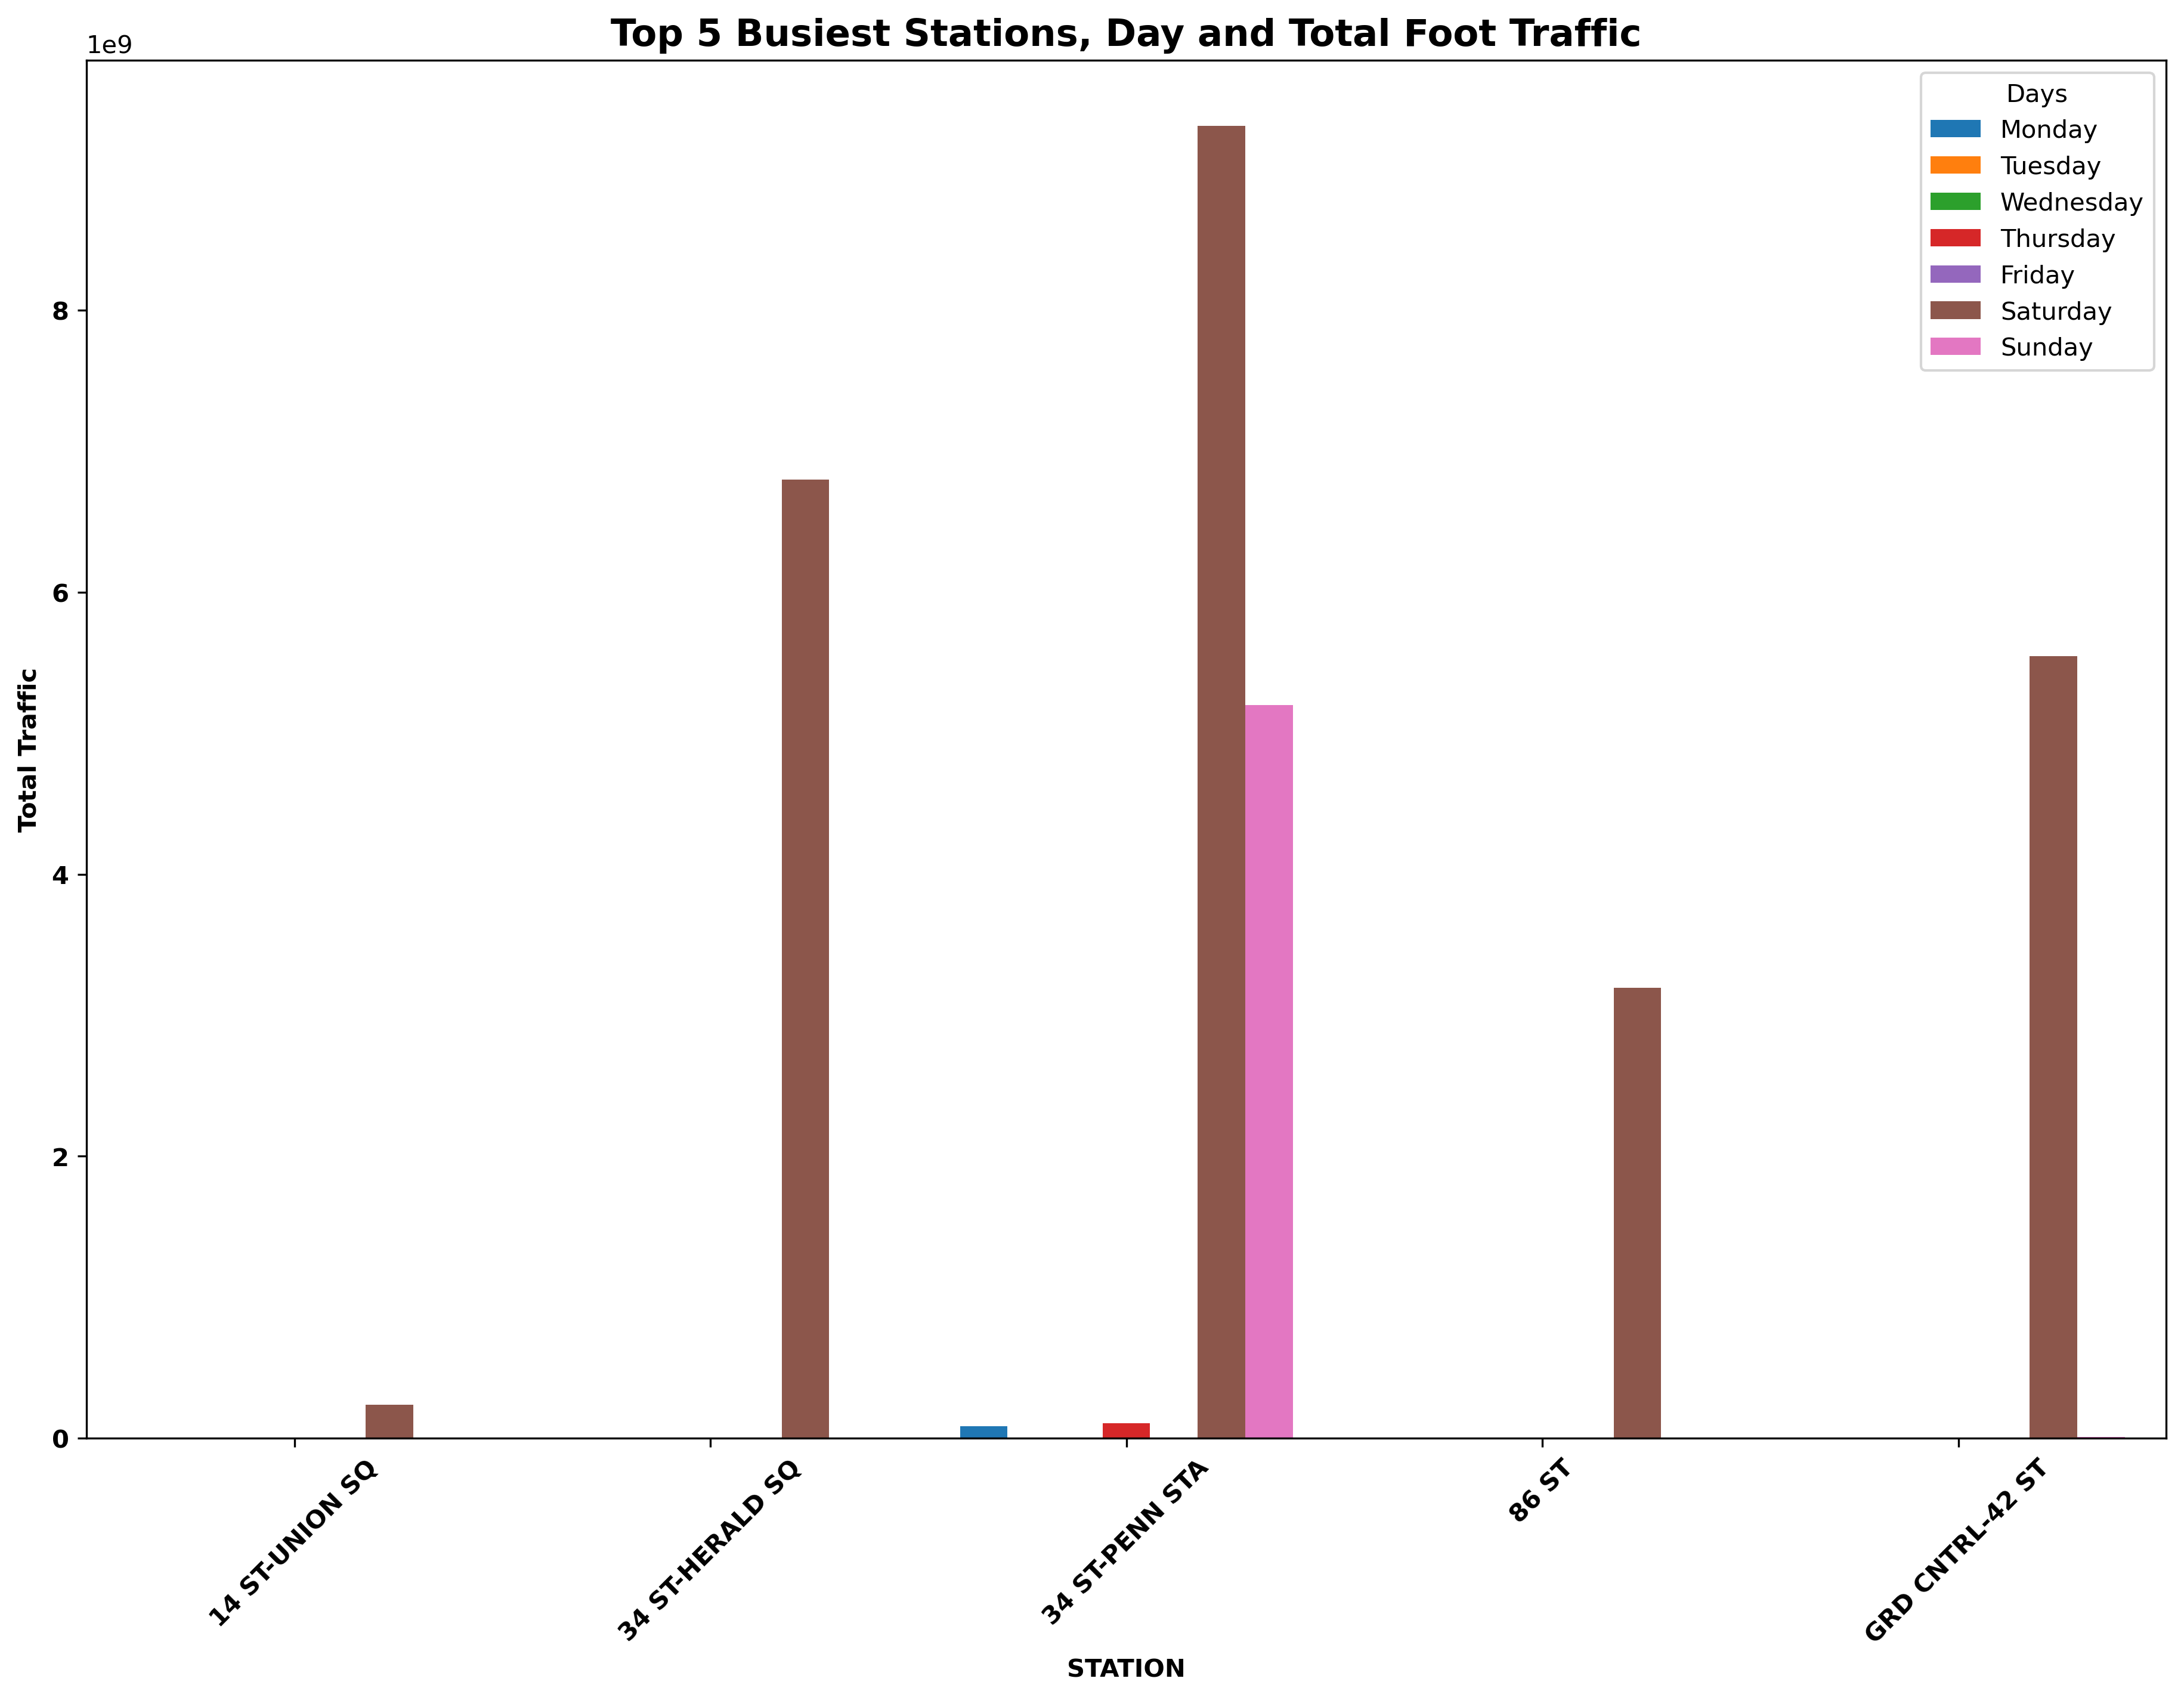

In [108]:
# Top 5 Busiest Stations per Day
hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,10),dpi=300)
plt.style.use('default')
ax = sns.barplot(x="STATION", y="FOOT_TRAFFIC", hue="NAMEOFDAY",data=top_5_daily, saturation=1,hue_order=hue_order)
plt.title("Top 5 Busiest Stations, Day and Total Foot Traffic", weight="bold", fontsize=15)
plt.xlabel("STATION",weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('bar_days.png', dpi=300)
plt.show()

In [ ]:
# Top 5 busiest statios busies hours per week of day
#top5_hourly= df_copy.groupby(['STATION','NAMEOFDAY','TIME'])['FOOT_TRAFFIC'].sum().sort_values(ascending=False)
# top5_hourly.head(20)
# sns.barplot()

In [ ]:
#dt=pd.DataFrame(top5_hourly)
# dt.groupby('NAMEOFDAY')['FOOT_TRAFFIC'].sort_values(ascending=False)
#sns.barplot(stacked=True)
#dt

In [ ]:
# sns.catplot(x="STATION", y="FOOT_TRAFFIC",
#                  hue="NAMEOFDAY", col="NAMEOFDAY",
#                  data=top_5_daily, kind="bar",
#                  height=4, aspect=.7,hue_order=hue_order)
# plt.xticks(rotation=80, weight="bold")


# HeatMap to Display the Days by the Stations

In [57]:
top_5_daily_heatmap = top_5_daily.groupby(['STATION', 'NAMEOFDAY']).FOOT_TRAFFIC.sum().reset_index()

In [58]:
top_5_daily_heatmap = top_5_daily_heatmap.pivot('NAMEOFDAY','STATION', 'FOOT_TRAFFIC')

In [59]:
top_5_daily_heatmap = top_5_daily_heatmap.astype({'14 ST-UNION SQ': 'int', 
                                                  '34 ST-HERALD SQ': 'int', 
                                                  '34 ST-PENN STA': 'int',
                                                 '86 ST' : 'int',
                                                 'GRD CNTRL-42 ST' : 'int'})

In [60]:
top_5_daily_heatmap = top_5_daily_heatmap.reindex(hue_order).reset_index()

In [61]:
top_5_daily_heatmap= top_5_daily_heatmap.set_index('NAMEOFDAY')

In [62]:
top_5_daily_heatmap

STATION,14 ST-UNION SQ,34 ST-HERALD SQ,34 ST-PENN STA,86 ST,GRD CNTRL-42 ST
NAMEOFDAY,,,,,
Monday,1451858,1657967,2254264,1525295,938341
Tuesday,1681477,1909919,2697714,4157083,-23621926
Wednesday,-862324,-40054143,1503108,6904302,2653913
Thursday,1720823,1458018,1934162,2041689,-365944
Friday,1651295,1761892,2393888,-28265500,2118130
Saturday,5787105,14232076,-61550568,-18036839,-106530632
Sunday,993733,1069510,1369978,880411,971344


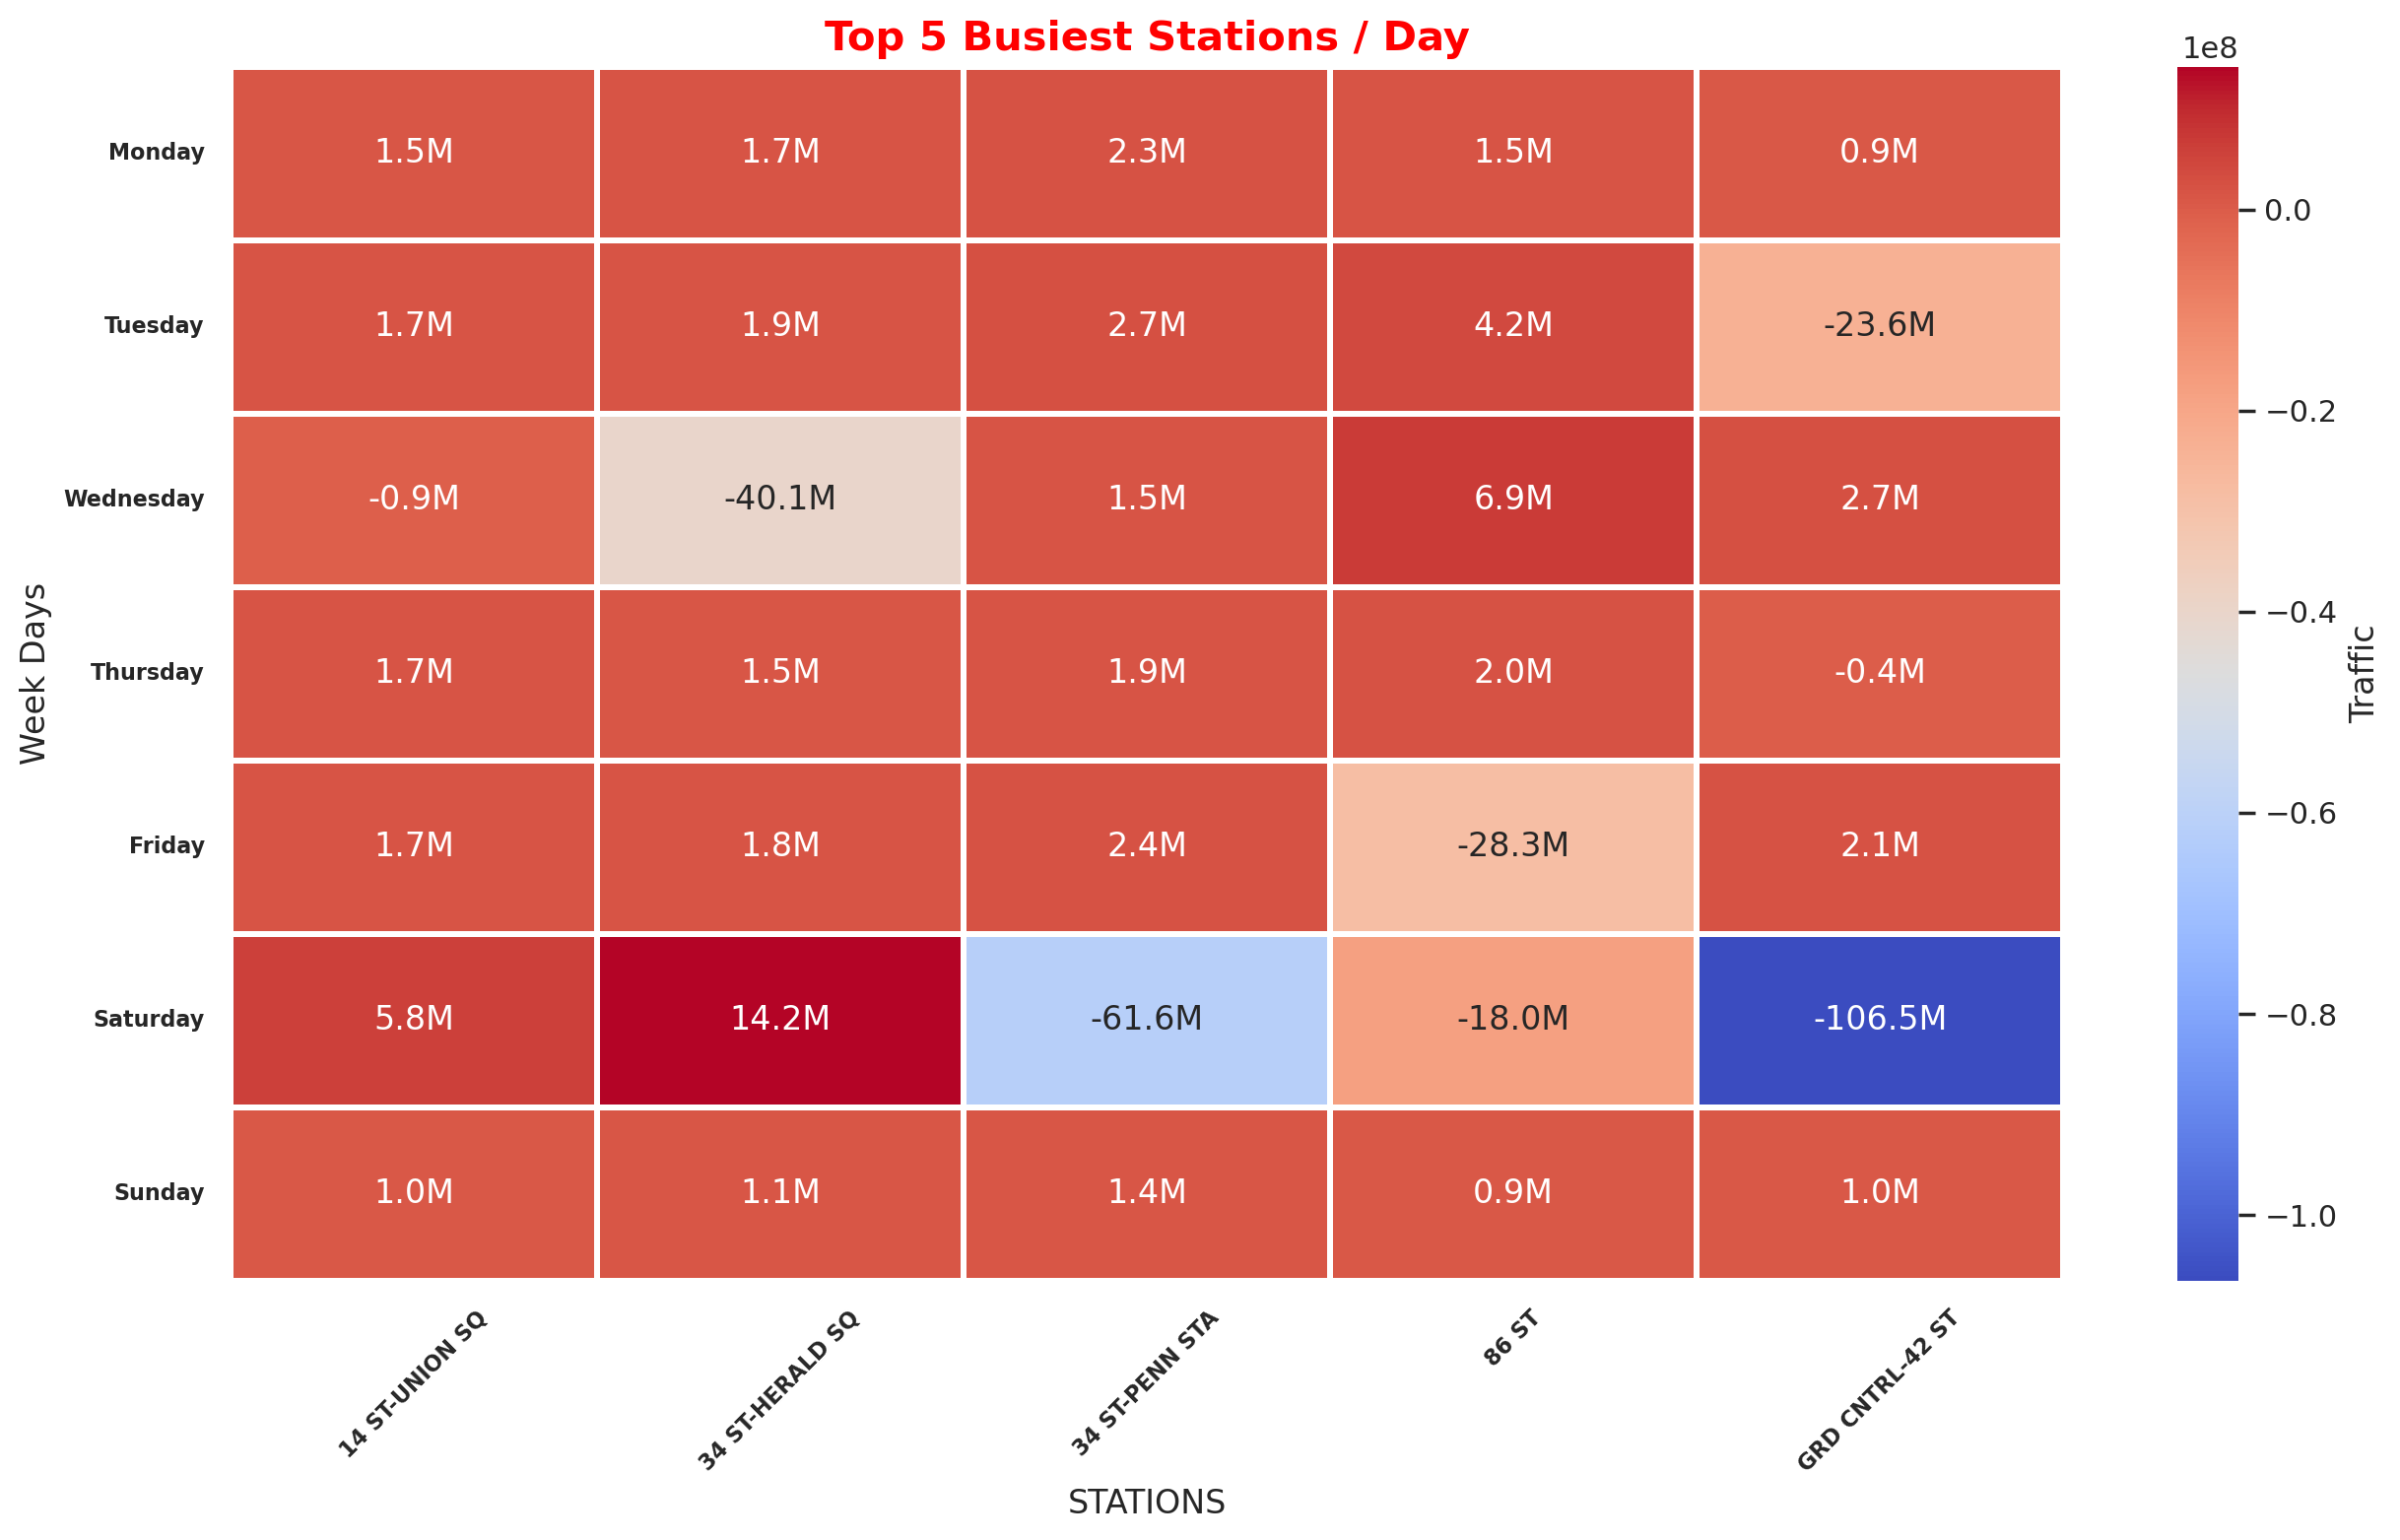

In [63]:
#Heatmap for per day per station
array = np.array(top_5_daily_heatmap.applymap(lambda x:str(round(x/1000000,1))+'M'))
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(top_5_daily_heatmap, linewidths=2, cmap="coolwarm",cbar_kws={'label': 'Traffic'}, annot = array, fmt = '')
plt.style.use('default')
plt.ylabel("Week Days")
plt.xlabel("STATIONS")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("Top 5 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
plt.savefig('station_day_heatmap.png', dpi=300)
plt.show()

# Calculating the time in the day


In [ ]:
df_timeline = df_copy.copy()

In [ ]:
df_timeline.head()

,STATION,TURNSTILE,DATE,TIME,Datetime,NAMEOFDAY,ENTRIES,EXITS,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
0,59 ST,A002-R051-02-00-00,05/22/2021,00:00:00,2021-05-22 00:00:00,Saturday,7575503,2588978,0.0,0.0,0.0
1,59 ST,A002-R051-02-00-00,05/22/2021,04:00:00,2021-05-22 04:00:00,Saturday,7575515,2588982,12.0,4.0,16.0
2,59 ST,A002-R051-02-00-00,05/22/2021,08:00:00,2021-05-22 08:00:00,Saturday,7575523,2588989,8.0,7.0,15.0
3,59 ST,A002-R051-02-00-00,05/22/2021,12:00:00,2021-05-22 12:00:00,Saturday,7575557,2588996,34.0,7.0,41.0
4,59 ST,A002-R051-02-00-00,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,7575630,2589008,73.0,12.0,85.0


In [ ]:
df_timeline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242282 entries, 0 to 5242281
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   STATION            object        
 1   TURNSTILE          object        
 2   DATE               object        
 3   TIME               object        
 4   Datetime           datetime64[ns]
 5   NAMEOFDAY          object        
 6   ENTRIES            int64         
 7   EXITS              int64         
 8   FOUR_HOUR_ENTRIES  float64       
 9   FOUR_HOUR_EXITS    float64       
 10  FOOT_TRAFFIC       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 479.9+ MB


In [ ]:
df_timeline_5 = df_timeline[(df_timeline["STATION"]=="34 ST-PENN STA") 
                   | (df_timeline["STATION"]=='GRD CNTRL-42 ST')
                  | (df_timeline["STATION"]=="86 ST")
                  | (df_timeline["STATION"]=="34 ST-HERALD SQ")
                  | (df_timeline["STATION"]=="14 ST-UNION SQ")]

In [ ]:
df_timeline['FOUR_HOUR_ENTRIES'] = df_timeline.groupby(['TURNSTILE']).FOUR_HOUR_ENTRIES.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))
df_timeline['FOUR_HOUR_EXITS'] = df_timeline.groupby(['TURNSTILE']).FOUR_HOUR_EXITS.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [ ]:
df_timeline_5 = df_timeline_5.groupby(['STATION','NAMEOFDAY','TIME'])['FOOT_TRAFFIC'].sum()

In [ ]:
df_timeline_5

STATION          NAMEOFDAY  TIME    
14 ST-UNION SQ   Friday     00:00:00     10427.0
                            01:00:00    165084.0
                            04:00:00      1522.0
                            05:00:00     18480.0
                            08:00:00      7733.0
                                          ...   
GRD CNTRL-42 ST  Wednesday  17:00:00    270451.0
                            19:00:00     21391.0
                            20:00:00    396023.0
                            21:00:00    262975.0
                            23:00:00      7095.0
Name: FOOT_TRAFFIC, Length: 678, dtype: float64

In [ ]:
df_5=pd.DataFrame(df_timeline_5)

In [ ]:
df_5 =df_5.reset_index()

In [ ]:
df_34 = df_5[df_5['STATION'] =='34 ST-PENN STA']

In [ ]:
df_34

,STATION,NAMEOFDAY,TIME,FOOT_TRAFFIC
174,34 ST-PENN STA,Friday,00:00:00,201719.0
175,34 ST-PENN STA,Friday,01:00:00,3150.0
176,34 ST-PENN STA,Friday,02:00:00,42950.0
177,34 ST-PENN STA,Friday,03:00:00,3009.0
178,34 ST-PENN STA,Friday,04:00:00,41743.0
...,...,...,...,...
382,34 ST-PENN STA,Wednesday,19:00:00,38698.0
383,34 ST-PENN STA,Wednesday,20:00:00,662810.0
384,34 ST-PENN STA,Wednesday,21:00:00,11498.0
385,34 ST-PENN STA,Wednesday,22:00:00,144941.0


In [ ]:
df_35 = df_34.groupby(["NAMEOFDAY","TIME"])

In [ ]:
df_35 = df_35["FOOT_TRAFFIC"].mean().reset_index()

In [ ]:
#Creating Pivot table for heatmap

df_35 = df_35.pivot(index="TIME", columns="NAMEOFDAY",values="FOOT_TRAFFIC")
df_35 = df_35[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

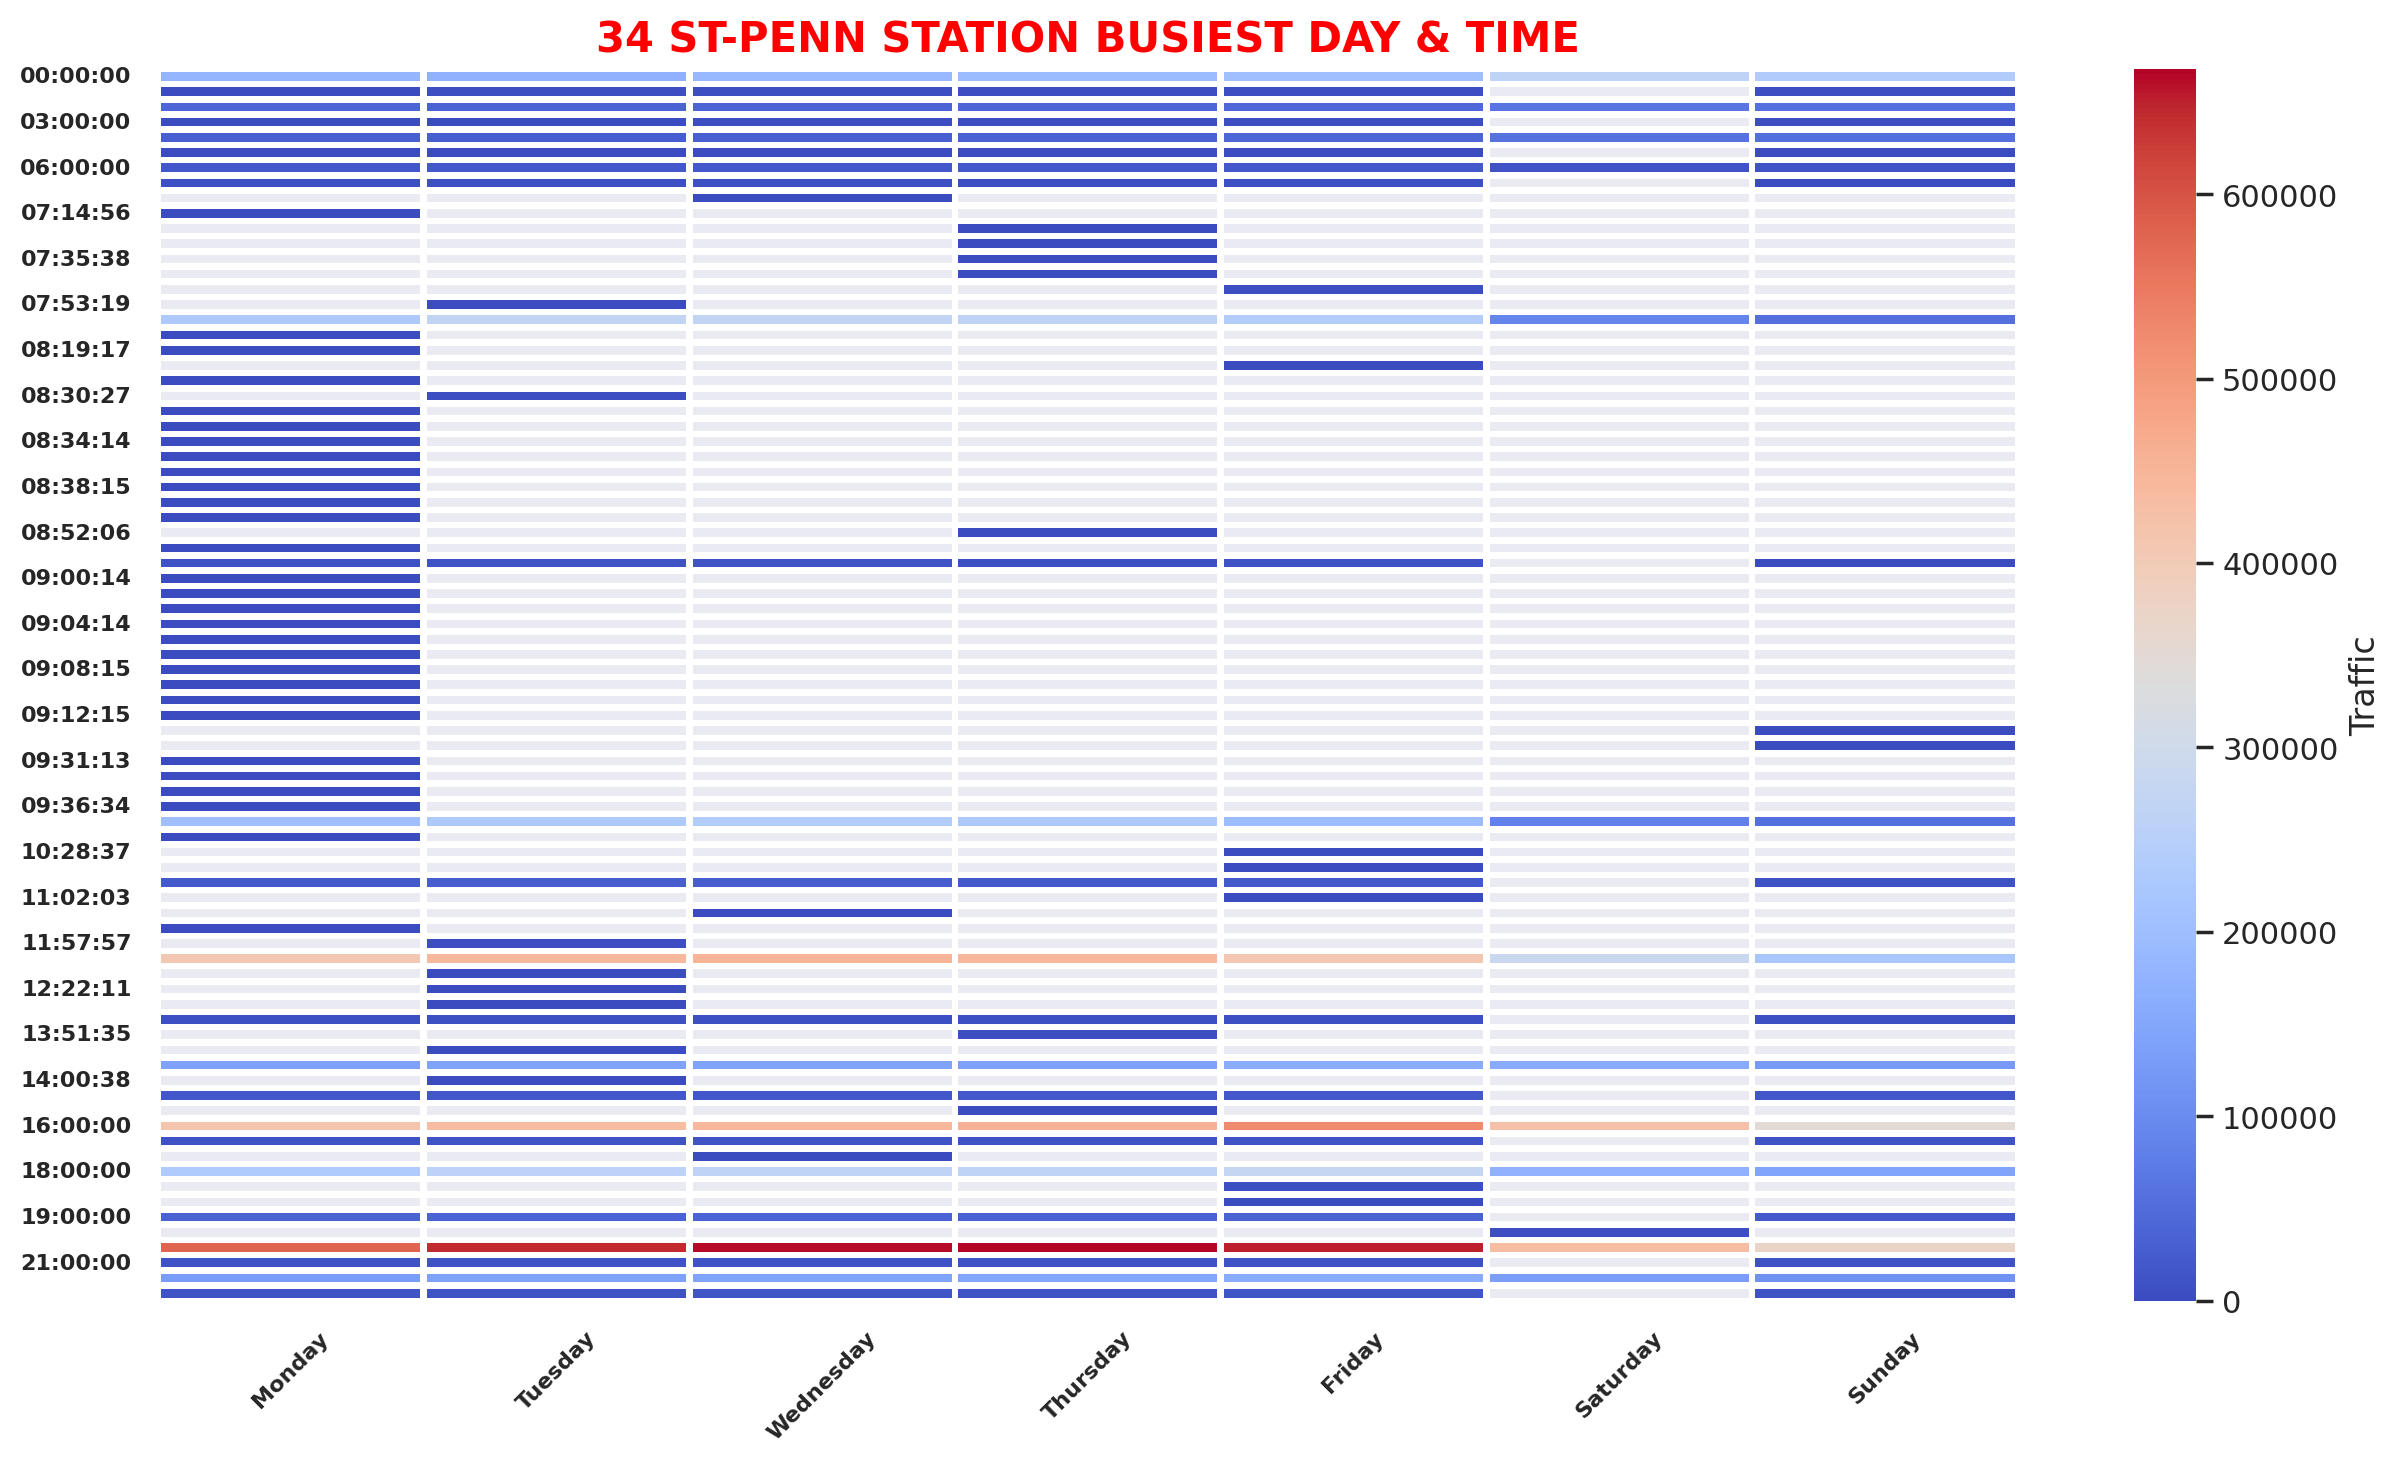

In [ ]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(df_35, linewidths=2, cmap="coolwarm",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("34 ST-PENN STATION BUSIEST DAY & TIME",weight="bold",c="red", fontsize=15)
plt.savefig('34st_data_discre.png', dpi=300)
plt.show()